In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [25]:
df = df.drop_duplicates()

In [26]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [27]:
df['color'].isna().sum()

19

In [28]:
len(df['director_name'].unique())

2399

In [29]:
df['director_name'].isna().sum()

103

In [30]:
director = df.groupby('director_name')['imdb_score'].mean().reset_index().sort_values('imdb_score', ascending=False)[:10]

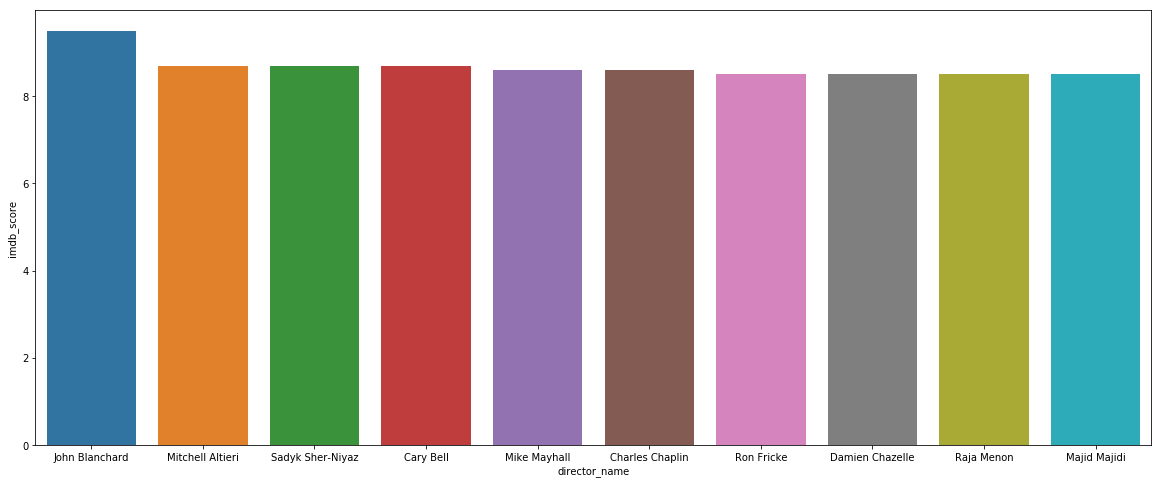

In [31]:
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=director,x="director_name",y="imdb_score")

Director generally do not affect the IMDB score but as compared to other directors, the films directed by John Blanchard does better in box office as compared to movies directed by other directors

In [42]:
genresdf = pd.DataFrame()

In [36]:
df.iloc[0]['genres'].split('|')

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [38]:
genre = []
score = []
for i in range(df.shape[0]):
    arr1 = df.iloc[i]['genres'].split('|')
    arr2 = [df.iloc[i]['imdb_score']]*len(arr1)
    genre.extend(arr1)
    score.extend(arr2)

In [43]:
genresdf['genre'] = genre
genresdf['imdb_score'] = score

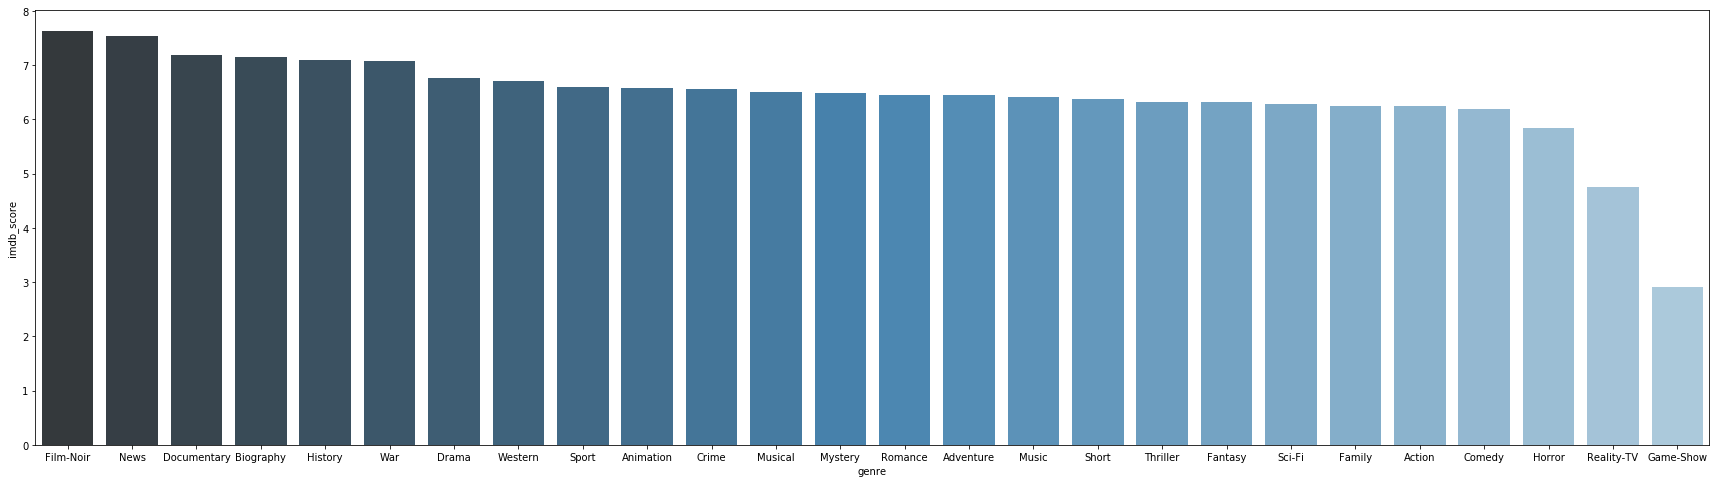

In [52]:
a4_dims = (30, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=genresdf.groupby('genre').mean().reset_index().sort_values('imdb_score',ascending=False),
            x="genre",y="imdb_score",palette="Blues_d")

Genres does not make much of a difference on imdb score but as seen if the genre of the movie is game-show then the score is really less, as compared to other movies.

In [53]:
df['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [54]:
df['content_rating'].isna().sum()/df.shape[0]

0.06022408963585434

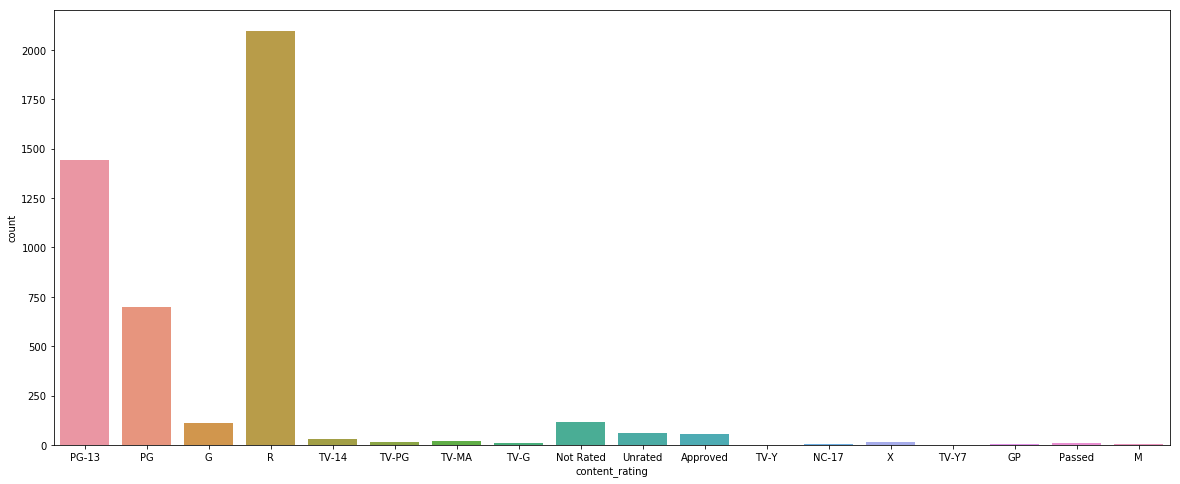

In [58]:
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df['content_rating'])

In [59]:
df['content_rating'] = df['content_rating'].fillna('R')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


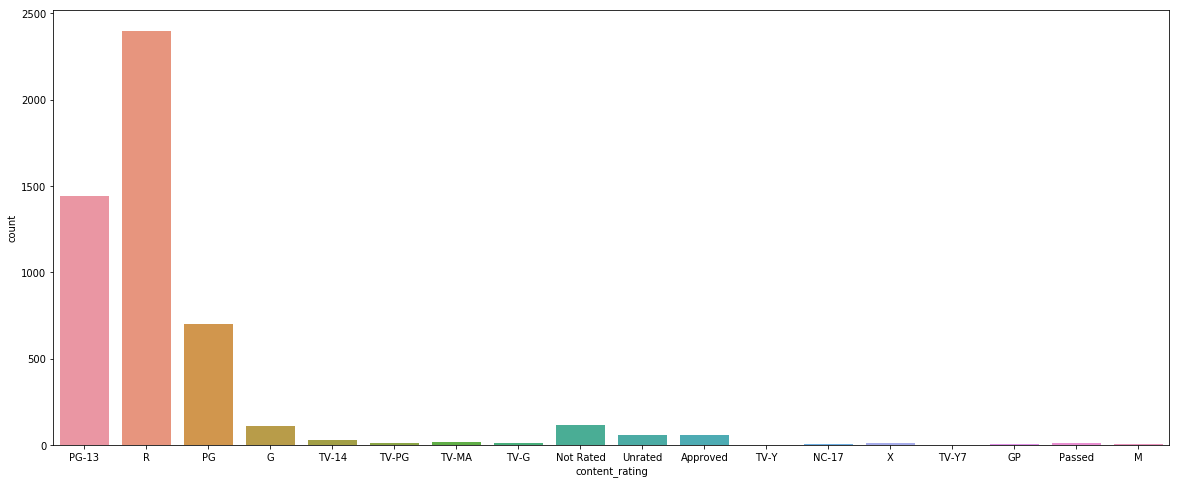

In [60]:
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df['content_rating'])

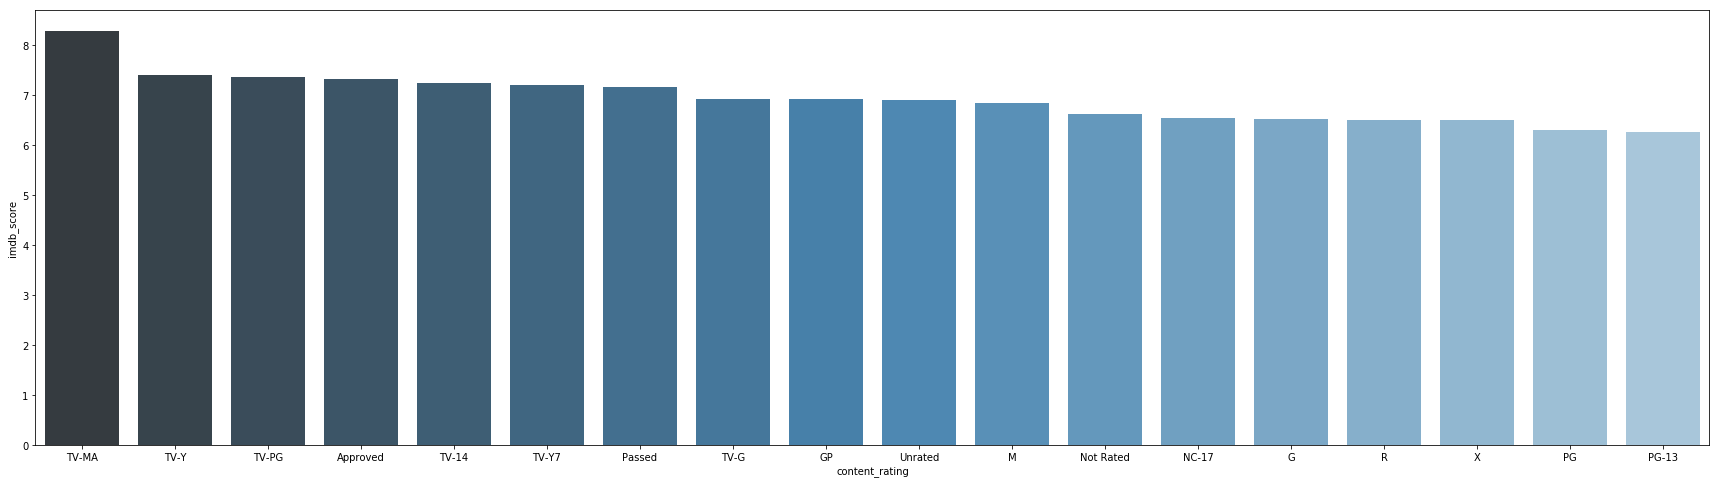

In [61]:
a4_dims = (30, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=df.groupby('content_rating')['imdb_score'].mean().reset_index().sort_values('imdb_score',
                                                                                             ascending=False),
            x="content_rating",y="imdb_score",palette="Blues_d")

Content rating does not really affect imdb score as it is almost same for every content rating

In [68]:
df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Gross income vs Budget of the film')

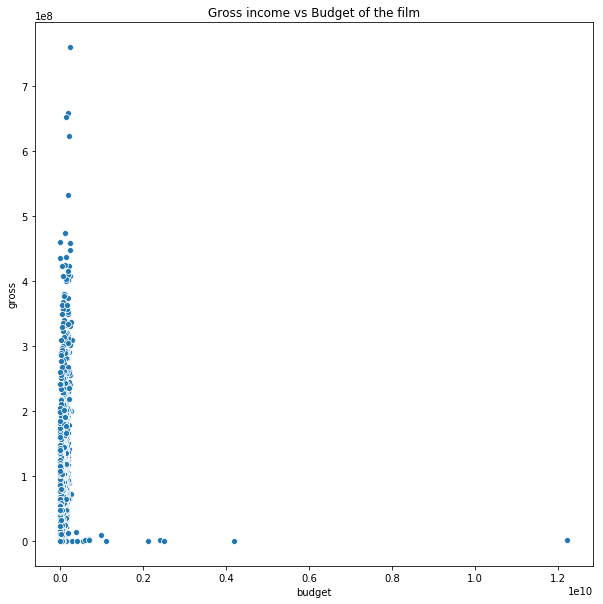

In [74]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x="budget", y="gross", data=df)
ax.set_title("Gross income vs Budget of the film")

In [70]:
df[df['budget']>=12000000000]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000


Though the IMDB score is 7, this Koream movie did not make that much money as compared to the budget of the movie. So it was not at all hit on the box-office. Hence its a waste of money(as budget wasn't formulated properly)

Text(0.5, 1.0, 'IMDB scores with facebook likes')

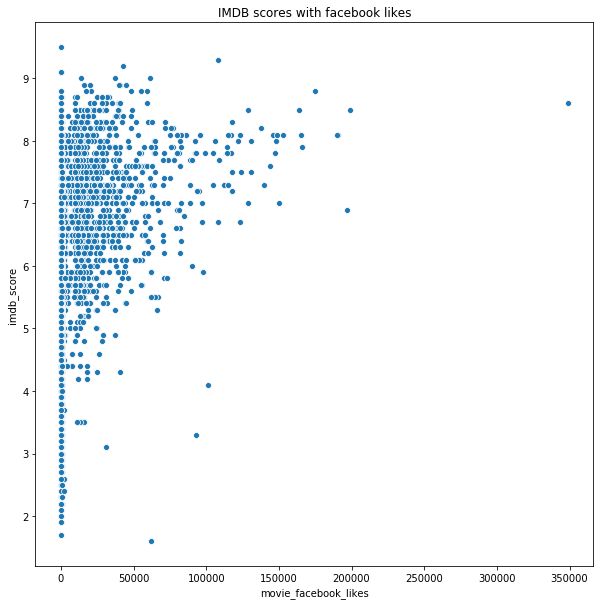

In [72]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x="movie_facebook_likes", y="imdb_score", data=df)
ax.set_title("IMDB scores with facebook likes")

Facebook likes does affect the imdb scores. There is a pattern of increasing imdb scores with increasing facebook likes. This will be a good feature to predict imdb scores.

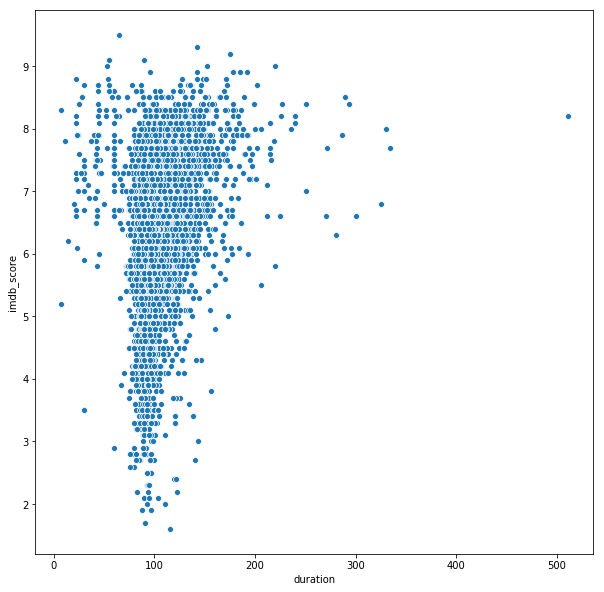

In [75]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x="duration", y="imdb_score", data=df)

There is no affect of duration on imdb scores as seen by the graph above

Now after performing feature selection on every feature, we can do feature engineering and after that we can apply ML algorithms to predict IMDB score for new set of movies. This is just with this kaggle data. We can collect scripts for few movies and perform NLP on that to predict how the movie will perform on box office based on its script.